In [48]:
from sklearn.model_selection import train_test_split
import pandas as pd

# leemos el dataset datos.csv
df = pd.read_csv('datos.csv')

# inicializamos variables de error
mse = []
r2 = []

# dividimos el dataset 30% para test y 70% para entrenamiento con random_state=0
train, test = train_test_split(df, test_size=0.3, random_state=0)

print('train:', train)
print('test:', test)

train:            x          y
60  0.870723  -6.613724
80  3.494097   3.194483
90  3.061982  -8.460176
68  0.270228  -3.490848
51  5.811455  36.308788
..       ...        ...
96  2.117848  -8.607422
67  3.907538   2.230945
64 -0.016884  -1.795071
47  0.930901  -1.279184
44  5.212258  21.842701

[70 rows x 2 columns]
test:            x          y
26  3.532415  -5.926732
86 -0.570492  -6.267327
2  -3.602674 -58.873048
55 -3.602677 -53.223182
75  2.204725  -0.018494
93  5.313150  21.004471
16  4.663357   2.933950
73  4.738467  13.379936
54 -3.768826 -57.501679
95  5.878571  36.139165
53  3.240857  -5.988206
92  0.124306  -7.711811
78 -1.379908 -12.741766
13  1.862724  -5.406725
7   0.668410  -2.074798
30  4.017381   0.078984
22  3.528957  -3.718344
24  6.841694  69.711563
33  6.890595  73.902102
8  -2.482237 -26.067870
43 -1.536339 -11.609925
62  4.083704   1.332747
3  -0.850265  -6.057589
71  1.499980  -2.407372
45  3.209531  -0.194480
48  1.968500   0.390088
6  -0.283113  -3.089740
99 -

Regresión lineal (OLS) por cuadrados ordinarios

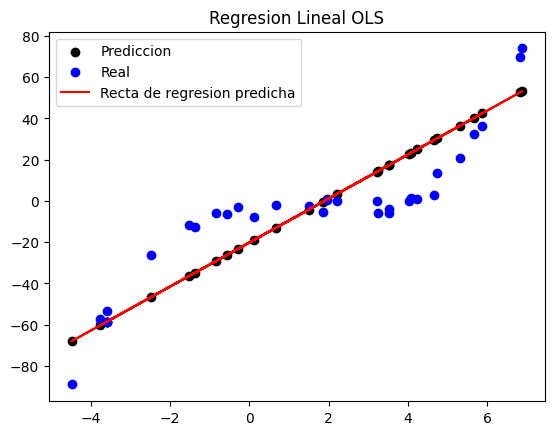

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator


# Usando el dataset hacemos una regreson lineal OLS
X_train = train[['x']]
y_train = train['y']
X_test = test[['x']]
y_test = test['y']

# Creamos el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos la prediccion
y_pred = model.predict(X_test)

# Calculamos el error mse y r2
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

# Hacemos el plot
plt.scatter(X_test, y_pred, color='black', label='Prediccion')
plt.scatter(X_test, y_test, color='blue', label='Real')
# pintamos la recta
plt.plot(X_test, y_pred, color='red', label='Recta de regresion predicha')
plt.legend()
plt.title('Regresion Lineal OLS')
plt.show()

Regresión polinomial de grado 2 con OLS

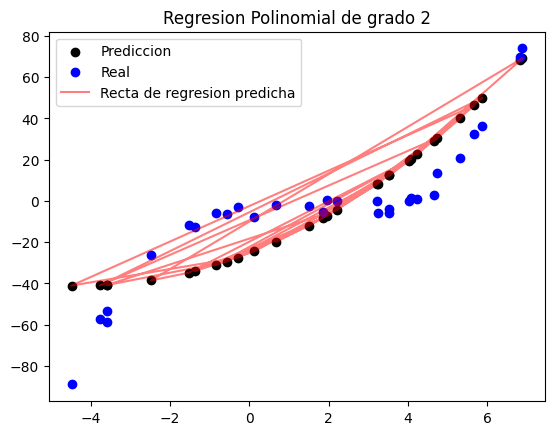

In [50]:
# Hacemos una regresion polinomial de grado 2
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# Calculamos el error mse y r2
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

# Hacemos el plot
plt.scatter(X_test, y_pred, color='black', label='Prediccion')
plt.scatter(X_test, y_test, color='blue', label='Real')
# pintamos la recta
plt.plot(X_test, y_pred, color='red', label='Recta de regresion predicha', alpha=0.5)
plt.legend()
plt.title('Regresion Polinomial de grado 2')
plt.show()

Regresión polinomial de grado 3

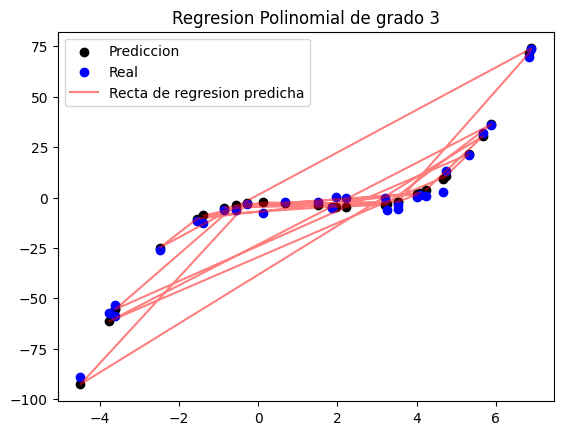

In [51]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# Calculamos el error mse y r2
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

# Hacemos el plot
plt.scatter(X_test, y_pred, color='black', label='Prediccion')
plt.scatter(X_test, y_test, color='blue', label='Real')
# pintamos la recta
plt.plot(X_test, y_pred, color='red', label='Recta de regresion predicha', alpha=0.5)
plt.legend()
plt.title('Regresion Polinomial de grado 3')
plt.show()

Regresión lineal SGD

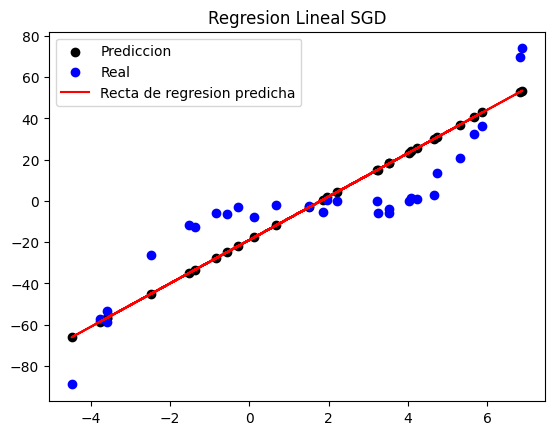

In [52]:
model = SGDRegressor(max_iter=1000, tol=1e-3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculamos el error mse y r2
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

# Hacemos el plot
plt.scatter(X_test, y_pred, color='black', label='Prediccion')
plt.scatter(X_test, y_test, color='blue', label='Real')
# pintamos la recta
plt.plot(X_test, y_pred, color='red', label='Recta de regresion predicha')
plt.legend()
plt.title('Regresion Lineal SGD')
plt.show()

Regresión polinomial de grado 2 con SGD

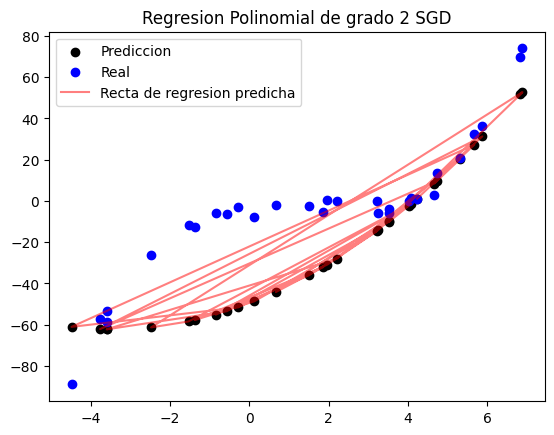

In [53]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = SGDRegressor(max_iter=1000, tol=1e-3)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# Calculamos el error mse y r2
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

# Hacemos el plot
plt.scatter(X_test, y_pred, color='black', label='Prediccion')
plt.scatter(X_test, y_test, color='blue', label='Real')
# pintamos la recta
plt.plot(X_test, y_pred, color='red', label='Recta de regresion predicha', alpha=0.5)
plt.legend()
plt.title('Regresion Polinomial de grado 2 SGD')
plt.show()

Regresión polinomial de grado 3 con SGD

Text(0.5, 1.0, 'Regresion Polinomial de grado 3 SGD')

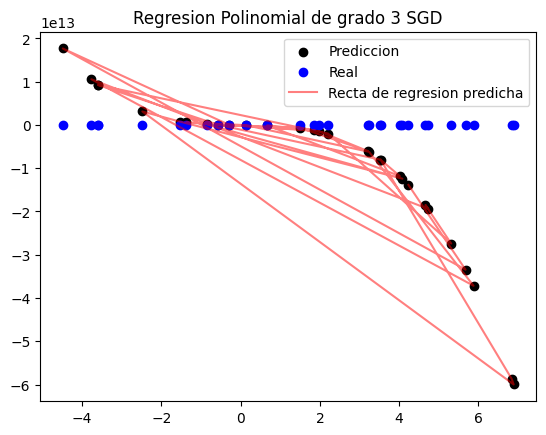

In [54]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = SGDRegressor(max_iter=1000, tol=1e-3)

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# Calculamos el error mse y r2
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

# Hacemos el plot
plt.scatter(X_test, y_pred, color='black', label='Prediccion')
plt.scatter(X_test, y_test, color='blue', label='Real')
# pintamos la recta
plt.plot(X_test, y_pred, color='red', label='Recta de regresion predicha', alpha=0.5)
plt.legend()
plt.title('Regresion Polinomial de grado 3 SGD')

Imprimimos los errores MSE (error de minimos cuadrados) y r2 score

In [63]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['Modelo', 'MSE', 'R2']

table.add_row(['OLS', mse[0], r2[0]])
table.add_row(['Polinomial 2', mse[1], r2[1]])
table.add_row(['Polinomial 3', mse[2], r2[2]])
table.add_row(['SGD', mse[3], r2[3]])
table.add_row(['Polinomial 2 SGD', mse[4], r2[4]])
table.add_row(['Polinomial 3 SGD', mse[5], r2[5]])

print(table)

+------------------+------------------------+------------------------+
|      Modelo      |          MSE           |           R2           |
+------------------+------------------------+------------------------+
|       OLS        |   296.0945867766399    |   0.7198048208163852   |
|   Polinomial 2   |   352.4373840101118    |   0.6664874659184123   |
|   Polinomial 3   |   8.487854131822628    |   0.9919679186464004   |
|       SGD        |   294.02740321367617   |   0.7217610027079069   |
| Polinomial 2 SGD |   722.0270524382101    |   0.3167436745949237   |
| Polinomial 3 SGD | 4.1089265381084436e+26 | -3.888289279891813e+23 |
+------------------+------------------------+------------------------+
